# Fidelity Visualization

We ran this notebooks along with all results by running `run_experiment_one_dataset.ipynb` on all datasets. We used kaggle to run this notebook. Please modify the paths to suit your configurations accordingly.

In [1]:
DATA_NAME = 'PLT-DOC'

import pickle
import numpy as np

def get_accuracy_each_style(all_test_results_filepath):
    with open(all_test_results_filepath, 'rb') as handle:
        EACH_TRIAL_CLASS_NAMES, EACH_TRIAL_STYLE_NAMES, each_trial_heatmap_acc = pickle.load(handle)
    ALL_STYLE_NAMES = np.unique(sum(EACH_TRIAL_STYLE_NAMES, []))
    N_TRIALS = len(EACH_TRIAL_CLASS_NAMES)
    print('N_TRIALS: ', N_TRIALS)
    accuracy_each_style = {}
    for STYLE_NAME in ALL_STYLE_NAMES:
        style_acc = []
        for trial in range(N_TRIALS):
#             print('trial: ', trial)
            if STYLE_NAME not in EACH_TRIAL_STYLE_NAMES[trial]:
                continue
            style_idx_in_trial = EACH_TRIAL_STYLE_NAMES[trial].index(STYLE_NAME)
            heatmap_acc = each_trial_heatmap_acc[trial]
            for i in range(3):
                style_acc.append(heatmap_acc[style_idx_in_trial, i])
        accuracy_each_style[STYLE_NAME] = style_acc
    return accuracy_each_style, ALL_STYLE_NAMES
orig_accuracy_each_style, ALL_STYLE_NAMES = get_accuracy_each_style('/kaggle/input/plt-doc-qc/PLT-DOC-QC_ORIGINAL_all_test_results_trial_0-100.pkl')
stylized_accuracy_each_style, ALL_STYLE_NAMES = get_accuracy_each_style('/kaggle/input/plt-doc-qc/PLT_DOC-QC_STYLIZED_all_test_results_trial_0-100.pkl')

In [7]:
ORIG_accuracy_per_style = []
for STYLE_NAME in ALL_STYLE_NAMES:
#     print(np.nanmean(np.array(orig_accuracy_each_style[STYLE_NAME])))
    ORIG_accuracy_per_style.append(np.nanmean(np.array(orig_accuracy_each_style[STYLE_NAME])))#.mean())
    print(STYLE_NAME, len(orig_accuracy_each_style[STYLE_NAME]))
print("It's normal for the accuracy length to vary among different styles since we sample three styles for each trial, and with a total of 100 trials, it's expected that some styles will be sampled more frequently than others")
print('ORIG mean = ', np.nanmean(np.array(ORIG_accuracy_per_style)))#.mean())
print('ORIG std = ', np.nanstd(np.array(ORIG_accuracy_per_style)))#.std())

abstract_illusionism 42
american_barbizon_school 42
american_impressionism 30
analytical_art 60
arts_and_crafts_movement 51
aurora 33
autumn_leaves 75
chinese_art 54
cloud 36
dawn 42
fauvism_painting 48
hurricane 63
land_art 45
meadow 45
prehistorian_painting 45
rayonism 54
swamp 36
thunder 24
water_lilies 36
wave 39
It's normal for the accuracy length to vary among different styles since we sample three styles for each trial, and with a total of 100 trials, it's expected that some styles will be sampled more frequently than others
ORIG mean =  0.6568244810105447
ORIG std =  0.022684049295209643


In [9]:
STYLIZED_accuracy_per_style = []
for STYLE_NAME in ALL_STYLE_NAMES:
    STYLIZED_accuracy_per_style.append(np.nanmean(np.array(stylized_accuracy_each_style[STYLE_NAME])))#.mean())
print('STYLIZED mean = ', np.nanmean(np.array(STYLIZED_accuracy_per_style)))#.mean())
print('STYLIZED std = ', np.nanstd(np.array(STYLIZED_accuracy_per_style)))#.std())

STYLIZED mean =  0.45826508940954813
STYLIZED std =  0.01950523221680933


In [13]:
import os
for dataset in os.listdir('/kaggle/input/'):
    print(dataset)

birds-qc
airplanes-qc
plt-net-qc
resisc-qc
texture-dtd
plt-doc-qc
awa-qc
73sports-qc
ins2-qc
dogs-qc
rsisb-qc
medical-leaf-qc


In [14]:
# compute fidelity of all datasets
original_perf_all_dataset_all_style = {}
stylized_perf_all_dataset_all_style = {}
import os
for STYLE_NAME in ALL_STYLE_NAMES:
    original_perf_all_dataset_all_style[STYLE_NAME] = []
    stylized_perf_all_dataset_all_style[STYLE_NAME] = []
    for dataset in os.listdir('/kaggle/input/'):
        for perf_file in os.listdir(f'/kaggle/input/{dataset}'):
            if 'STYLIZED' in perf_file:
                stylized_accuracy_each_style, ALL_STYLE_NAMES = get_accuracy_each_style(f'/kaggle/input/{dataset}/{perf_file}')
            else:
                orig_accuracy_each_style, ALL_STYLE_NAMES = get_accuracy_each_style(f'/kaggle/input/{dataset}/{perf_file}')  
        original_perf_all_dataset_all_style[STYLE_NAME].append(np.nanmean(np.array(orig_accuracy_each_style[STYLE_NAME])))
        stylized_perf_all_dataset_all_style[STYLE_NAME].append(np.nanmean(np.array(stylized_accuracy_each_style[STYLE_NAME])))
                         
    print('ORIG std = ', np.nanstd(np.array(ORIG_accuracy_per_style)))

N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
ORIG std =  0.022684049295209643
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
ORIG std =  0.022684049295209643
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TRIALS:  100
N_TR

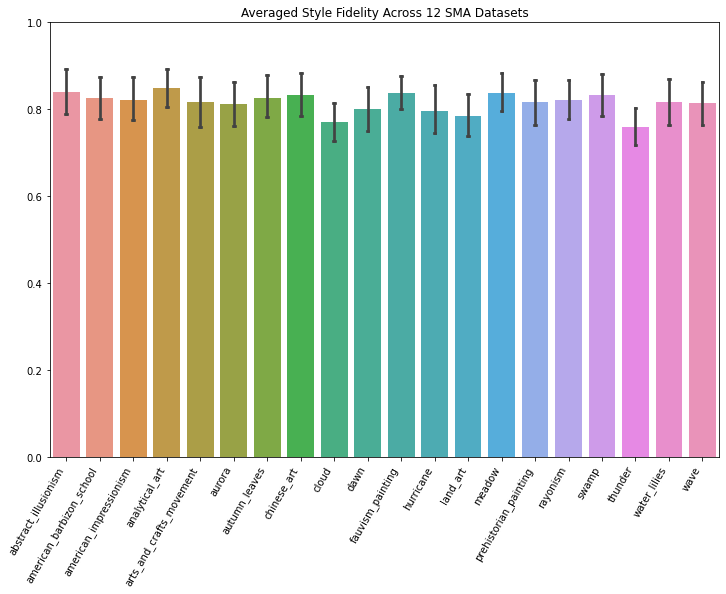

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
xs = []
ys = []
for STYLE_NAME in ALL_STYLE_NAMES:
    ys.extend(np.array(stylized_perf_all_dataset_all_style[STYLE_NAME]) / np.array(original_perf_all_dataset_all_style[STYLE_NAME]))
    xs.extend([STYLE_NAME]*len(stylized_perf_all_dataset_all_style[STYLE_NAME]))
plt.figure(figsize=(12,8))
plt.ylim(top=1.0)
sns.barplot(x=xs, y=ys, capsize=0.05, ci=95)
plt.xticks(rotation=60, ha='right')
plt.title('Averaged Style Fidelity Across 12 SMA Datasets')
plt.savefig('fidelity-AdaIN-QC-all-datasets')
plt.show()